Python Machining Learning
=========================

Since my last visit with you, I have looked for more detailed information on what Machine Learning is, and I resorted to a book called "Python Machine Learning" by Sebastian Raschka. Of course, the Udacity course is very educational, but I feel like I am skipping a lot of steps, as I have not taken a statistic course or anything about linear algebra. If you have heard of this book, then I would love to receive your input on the quality of it, but in case if you haven't, this ML book started at a place I am fairly comfortable with, and slowly introduced new concepts that either he explains on the spot or I can learn via Google in five minutes. So far I have been introduced to the different types of machine learning, like supervised, unsupervised, and reinforced, along with the basic workflow of developing a Machine Learning Model, from pre-processing to learning, to evaluation, and finally to prediction. In addition to conceptual stuff, I have also learned what is the perceptron algorithm for binary classification tasks and how to implement it in python. Below is the code for it.

In [45]:
import numpy as np
class Perceptron(object):
    """Perception classifier.
    
    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passed over the training dataset.
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch.
        
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number
            of samples and n_features is the number of
            features.
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        --------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

Now that the percepton is coded, we are going to train it using the Iris dataset from the UCI Machinle Learning Repository. We will only be looking at two features, <i>speal length</i> and <i>petal length</i>, and two flower classes, <i>Setosa</i> and <i>Versicolor</i>, but this model can be expanded to have multi-class classification and multi-feature analysis. 

There was some difficulties acessing <i>iris.data</i> with pandas(SSL Certification Error), so instead I downloaded it to local drive and then opened it. Below is a sample of the dataset, and if you are having trouble seeing it, please make sure you also have iris.data from the GitHub Repo in the same directory as this Python Notebook.

In [46]:
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


We now extract the first 100 class labels, 50 <i>Iris-Setosa</i> and 50 <i>Iris-Versicolor</i>, and convert the them to either 1 or -1, so we can use them in our step function. We will also extract the first and third column of the first 100 samples, which are the <i>sepal length</i> and <i>petal length</i> features we want to look at, and assign them to a feature matrix X, which we will visualize via a 2D scatter plot.

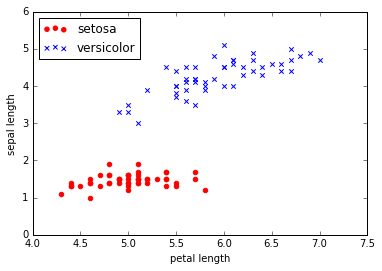

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50, 1],
           color = 'red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color = 'blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

As we can clearly see, there is a distinctive separation between setosa and versicolor datapoints, and now we will train the perception algorithm with this dataset and see if it can also find a decision boundary that separates these classes.

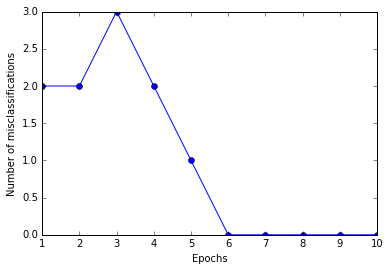

In [48]:
%matplotlib inline
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

From the plot above, we can see that our perceptron algorithm already converged at the 6th Epoch, so now it should be confident at predicting any future samples, but right now we will define another function to visualize the decision boundary.

In [49]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decison surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha = 0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

The above code first sets up the marker and color map that we want to use for the graph, then proceeds to find the max and min for the two features so it can create two grid array xx1 and xx2 with those values and resolution as specified. Since our Perceptron's <code>predict()</code> method takes a 2D array as its sample, we need to first flatten xx1 and xx2, then combine them so first column is sepal length and second column is petal length. After Perceptron's predict function, Z now contains the Perceptron's decision on which sample is which flower, but it has to be reshaped in order to be graphed correctly. Here is where I am personally very impressed with Python, as one simple line <code>Z = Z.reshape(xx1.shape)</code> can analyze Z and xx1's shape, and "automagically" transform Z's shape into xx1's. Anyway afterwards xx1, xx2, Z are all then plotted with the specified colormap and axises are also limited to show only the range of features. Finally the class samples are also plotted onto the graph to demostrate that the program correctly decided the boundary of classification.

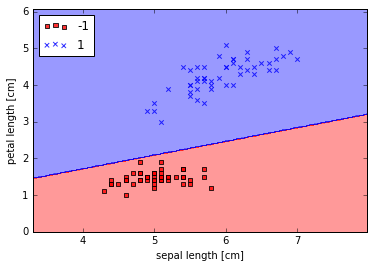

In [50]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Knowing that the code works, I changed some of the values to see what difference it would make to how accurate the boundary is, and one of the values I changed was the resolution that was used to space x1_min to x1_max and x2_min and x2_max out. Here is another graph with resolution 0.2 instead of 0.02:

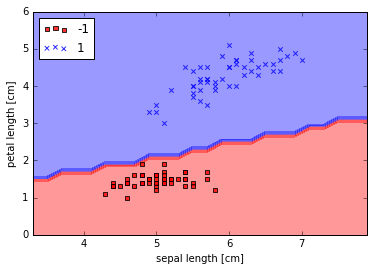

In [53]:
plot_decision_regions(X, y, classifier=ppn, resolution=0.2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

As we can see, the line separating two regions is definitely not as smooth as it was before, but it still offers a correct boundary line that separates the two regions without any error. So far I was able to play around with the variables and still obtain perfect classification, but I suspect that is only because the dataset is very clean and separable, and in the future I wonder how a noisy dataset will limit my play with the variables.